Instalace závislostí

In [74]:
! python -m pip install --upgrade pip
! python -m pip install pandas matplotlib

You are using pip version 6.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached pip-9.0.1-py2.py3-none-any.whl
  Found existing installation: pip 6.1.1
    Not uninstalling pip at /usr/local/lib/python3.4/dist-packages, outside environment /home/petr/PYT/titanic/env
You are using pip version 6.1.1, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [75]:
import pandas
import matplotlib
import matplotlib.style
matplotlib.style.use('ggplot')

# Zapnout zobrazování grafů (procento uvozuje „magickou” zkratku IPythonu):
%matplotlib inline

In [76]:
passengers=pandas.DataFrame.from_csv('titanic.csv', index_col=None)
del passengers['Unnamed: 0']
#passengers

O kolika pasažérech Titanicu víme?

In [77]:
count=len(passengers)
count

1313

Kolik procent jich přežilo?

In [78]:
survivors=passengers.loc[passengers['Survived'] == 1]
survivorsCount=len(survivors)
survivorsPerc=survivorsCount/count*100
survivorsPerc

34.27265803503427

Kolik procent žen přežilo?

In [79]:
women = passengers.loc[passengers['Sex'] == "female"]
womenCount = len(women)
survivedWomenCount = len(women.loc[women['Survived'] == 1])
survivedWomenCount/womenCount*100

66.66666666666666

Kolik procent mužů?

In [80]:
men = passengers.loc[passengers['Sex'] == "male"]
menCount = len(men)
survivedMenCount = len(men.loc[men['Survived'] == 1])
survivedMenCount/menCount*100

16.686251468860164

Pro každou třídu vypište kolik pasažérů dané třídy nastoupilo na loď, kolik jich přežilo, a kolik to dělá procent přeživších.

In [81]:
class1 = passengers.loc[passengers['PClass'] == "1st"]
class2 = passengers.loc[passengers['PClass'] == "2nd"]
class3 = passengers.loc[passengers['PClass'] == "3rd"]

class1Surv = class1.loc[class1['Survived'] == 1]
class2Surv = class2.loc[class2['Survived'] == 1]
class3Surv = class3.loc[class3['Survived'] == 1]

info = pandas.DataFrame([
        ["1.",len(class1),len(class1Surv),len(class1Surv)/len(class1)*100,len(class1Surv)/survivorsCount*100],
        ["2.",len(class2),len(class2Surv),len(class2Surv)/len(class2)*100,len(class2Surv)/survivorsCount*100],
        ["3.",len(class3),len(class3Surv),len(class3Surv)/len(class3)*100,len(class3Surv)/survivorsCount*100]
    ])
info=info.rename(columns={0:"Třída",1:"Nastoupilo",2:"Počet přeživších z třídy",3:"Kolik procent z třídy přežilo",4:"Jaká část přeživších patřilo do této třídy"}).set_index(["Třída"])
info

,Nastoupilo,Počet přeživších z třídy,Kolik procent z třídy přežilo,Jaká část přeživších patřilo do této třídy
Třída,,,,
1.,322,193,59.937888,42.888889
2.,279,119,42.652330,26.444444
3.,711,138,19.409283,30.666667


Vykreslete graf procenta přeživších podle dekády věku (t.j. procento pro 0-9 let, 10-19 let, atd.).

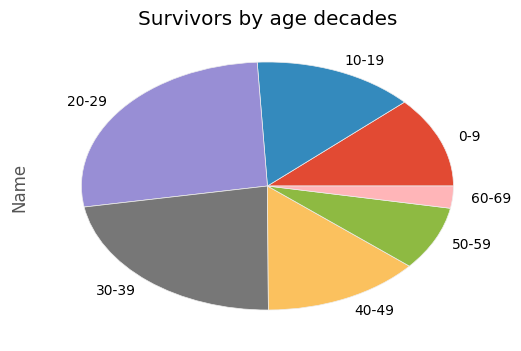

In [82]:
survivorsAge = survivors.groupby(survivors['Age']//10).count()
survivorsAge = survivorsAge['Name']
#survivorsAge
survivorsAge.plot.pie(title="Survivors by age decades",labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69'])

Závisí na sobě třída a věk pasažéra? Jak? Vykreslete graf(y), které tuto závislost znázorňují.

,PClass,Age
PClass,1.000000,-0.414121
Age,-0.414121,1.000000


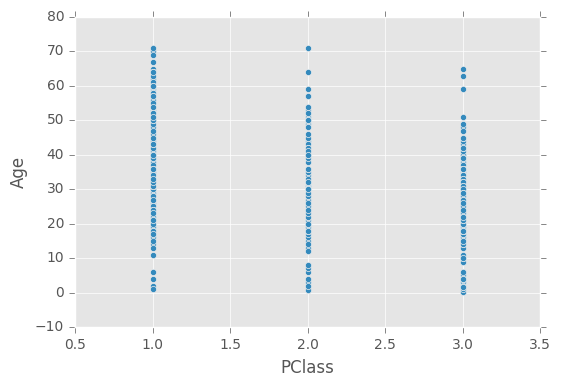

In [84]:
passengersClass = passengers.replace("1st",1).replace("2nd",2).replace("3rd",3)
passengersClass = passengersClass[['PClass','Age']]
passengersClass = passengersClass.dropna()
passengersClass.plot(y='Age',x='PClass', kind='scatter')
passengersClass.astype(float).corr()

Z vypočteného korelačního koeficientu vidíme, že mezi věkem a třídou závislost existuje. Korelační koeficient vyšel přibližně -0.4, tedy středně velká protizávislost. S roustoucím věkem tedy klesá třída (ve smyslu čím starší pasažéři, tím lepší třída). Vykreslený scatter graf tuto myšlenku také podporuje.